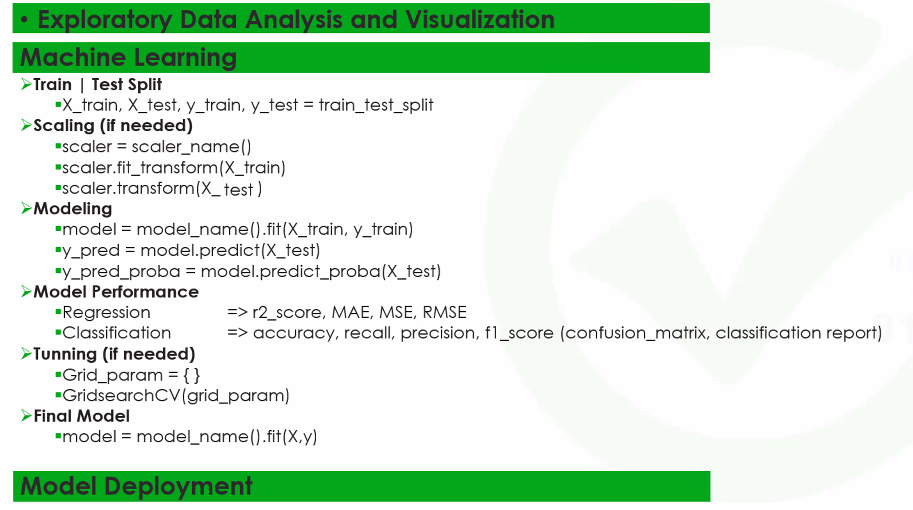


$$ z = \beta_0 + \beta_1x$$


$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

# Sigmoid Function

$$ \phi(z) = \frac{1}{1+e^{-z}}$$

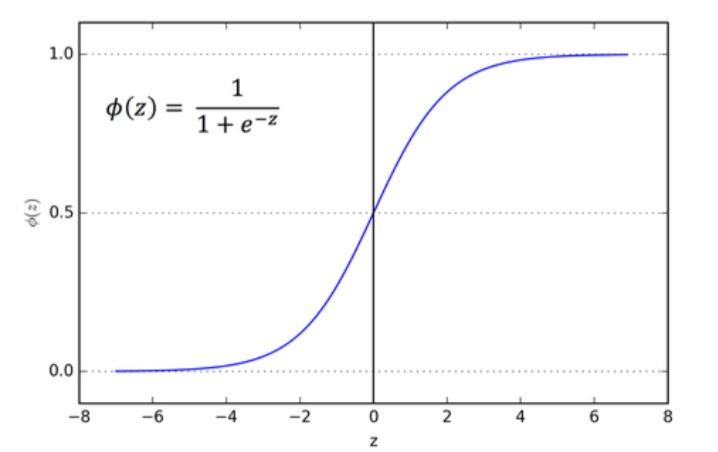

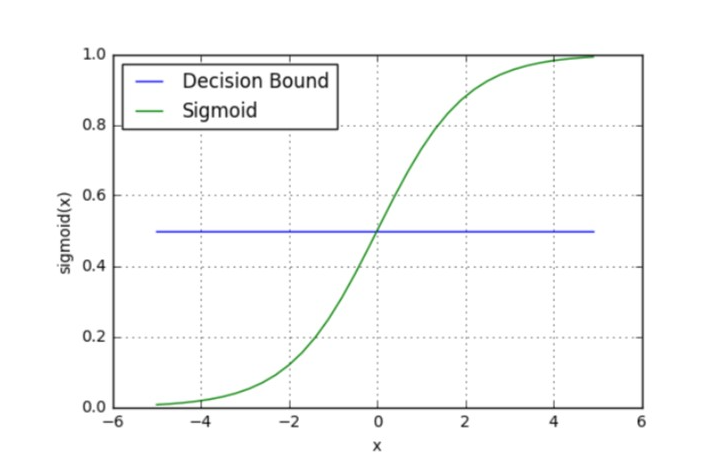

## Lojistik Regresyon'un Varsayımları (Assumptions)

**Sonuç değişkeni (label, class, target) kategoriktir**: Bu varsayıma göre, tahmin edilmek istenen sonuç değişkeni kategoriktir, yani iki veya daha fazla kategoriye ait olabilir. Örneğin, geçti/kaldı gibi iki sınıflı bir sonuç veya çok sınıflı bir sonuç olabilir.

**Gözlemler (veriler) birbirinden bağımsızdır**: Her gözlem, diğer gözlemlerden bağımsız olarak elde edilmiş olmalıdır. Bu, herhangi bir gözlemi diğer gözlemlerin sonuçları üzerinde etkisi olmadan gözlemlememiz gerektiği anlamına gelir. Yani multicollinearity istemeyiz.

**Girdiler (değişkenler) arasında korelasyon bulunmaz**: Modelin doğru bir şekilde çalışması için girdi değişkenleri (predictors) arasında yüksek bir korelasyon olmamalıdır. Yüksek korelasyonlu değişkenler, modelin performansını azaltabilir ve tahminlerde yanıltıcı sonuçlara neden olabilir.

**Lineer bir ilişki ile z değeri hesaplandığı için x ile z arasında lineer bir ilişki varsayar**: Logistic regresyon modeli, girdi değişkenleri ile çıktı değişkeni arasında lineer bir ilişki varsayar. Yani, log-odds değerini hesaplamak için kullanılan
$z$ değeri, girdi değişkenlerinin lineer kombinasyonu olarak ifade edilir.

**Logistic regresyonun başarılı olması için yüksek miktarda veri lazımdır**: Logistic regresyon modelleri genellikle büyük miktarda veriyle daha iyi performans gösterir. Bu, modelin doğru bir şekilde öğrenmesi ve genelleme yapabilmesi için önemlidir. Ayrıca, logistic regresyon modeli, lineer bir model olduğu için az miktarda veriyle kullanıldığında aşırı uydurma (overfitting) eğilimindedir ve yanıltıcı sonuçlar verebilir. Bu nedenle, modelin doğru bir şekilde çalışabilmesi için yeterli miktarda veriye ihtiyaç duyulur.

### Logistic Regression Türleri

1- Binary Logistic Regression (İki sınıflı logistic regresyon)
* 0 ve 1
* A ve B
* Evet ve Hayır
* Kabul ve Ret

2- Multinomial Logistic Regression (Üç veya daha fazla sınıflı logistic regresyon)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Notlar

- Lojistik regresyon anlaşılması kolay (user-friendly) ve hesaplama açısından verimlidir (computationally efficient).
- Karmaşık ilişkileri modellemekte sınırlı olabilir ve bazı varsayımlara (assumptions) ihtiyaç duyar.
- Daha karmaşık ilişkiler için karar ağaçları (decision trees), rastgele ormanlar (random forests) veya derin öğrenme (deep learning) gibi modeller tercih edilebilir.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


# EDA and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [5]:
df["test_result"].value_counts()

# Data'nın balanced|unbalanced olduğunu şu an karar veremiyoruz şüphe duymamız gereken bir dağılım var.
# Bu yüzden score'ları gördükçe balanced|unbalanced olduğunu göreceğiz

test_result
1    3000
0    2000
Name: count, dtype: int64

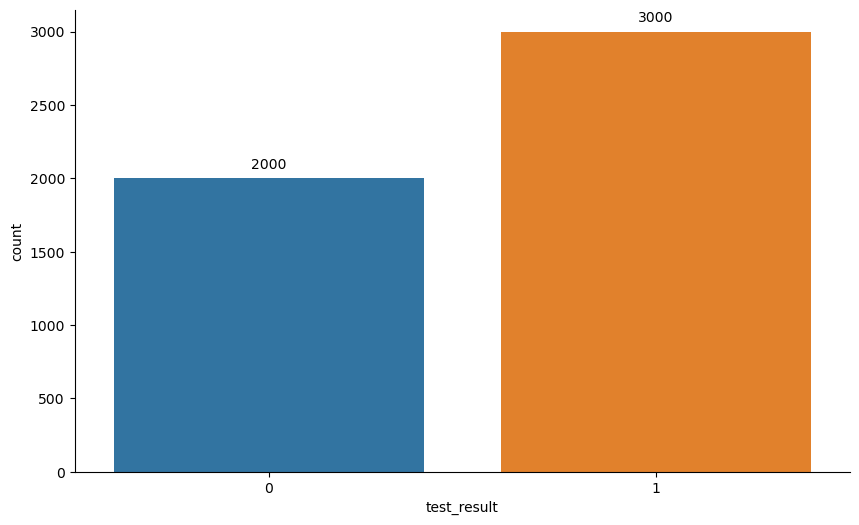

In [6]:
ax = sns.countplot(x=df["test_result"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

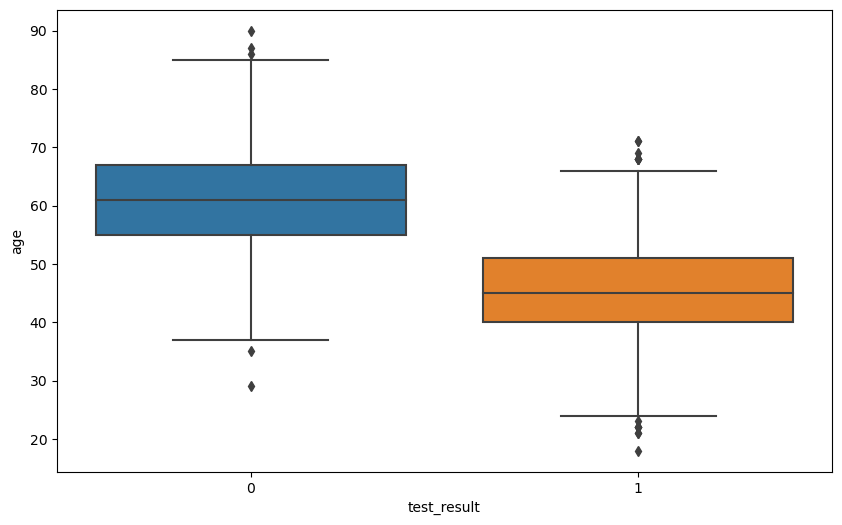

In [7]:
sns.boxplot(x="test_result", y="age", data=df);

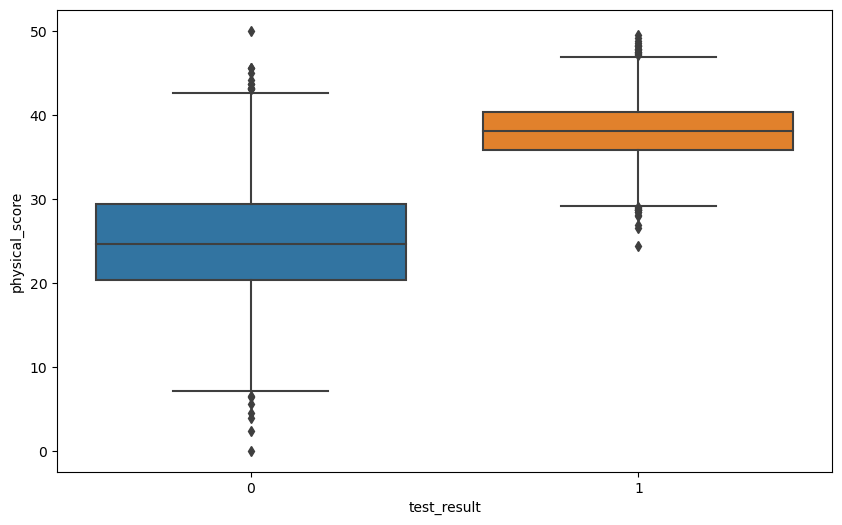

In [8]:
sns.boxplot(x="test_result", y="physical_score", data=df);

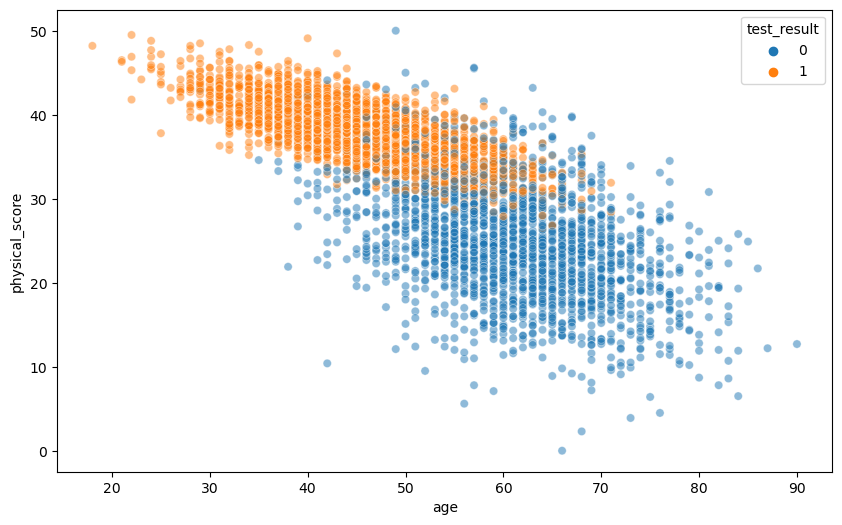

In [9]:
sns.scatterplot(x= "age", y = "physical_score", data = df, hue = "test_result", alpha = 0.5);

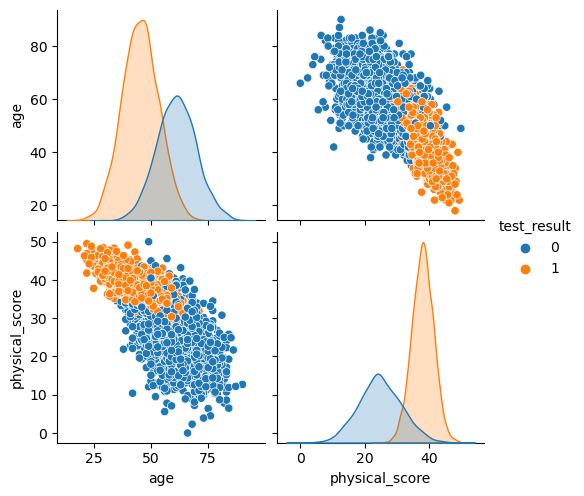

In [10]:
sns.pairplot(df, hue="test_result");

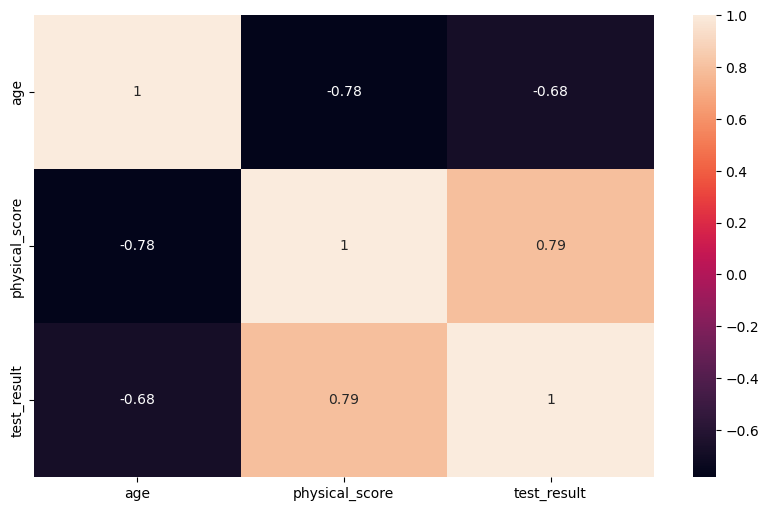

In [11]:
sns.heatmap(df.corr(), annot=True);

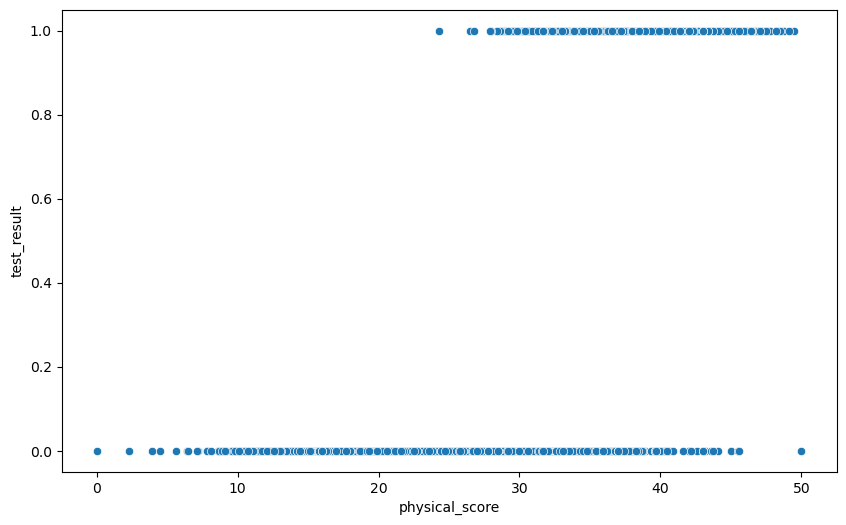

In [12]:
sns.scatterplot(x="physical_score", y="test_result", data=df);

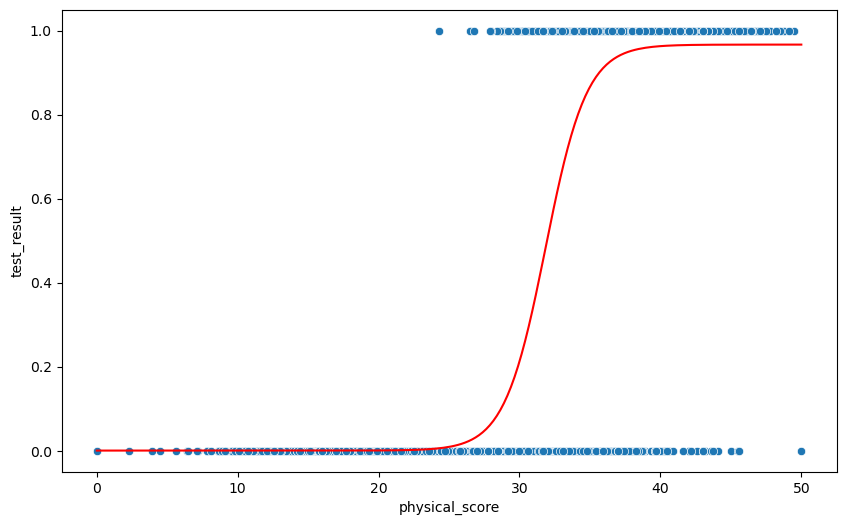

In [14]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

# Scatter plot oluştur
sns.scatterplot(x="physical_score", y="test_result", data=df)

# Sigmoid fonksiyonunu veriye uydur
popt, pcov = curve_fit(sigmoid, df['physical_score'], df['test_result'], method='dogbox', bounds=([0.,0.,0.,0.], [np.inf, np.inf, 1., np.inf]))

# Uygun sigmoid çizgiyi çiz
x_values = np.linspace(df['physical_score'].min(), df['physical_score'].max(), 200)
y_values = sigmoid(x_values, *popt)

plt.plot(x_values, y_values, color="red")

# Grafiği göster
plt.show()

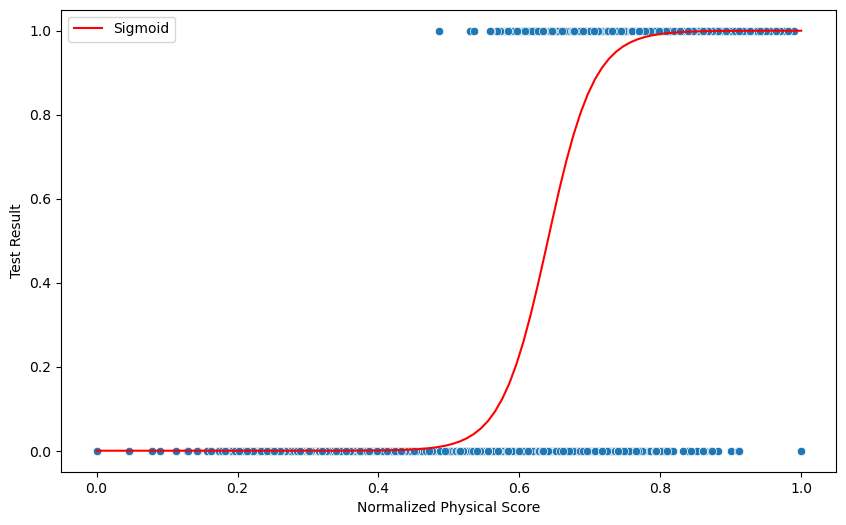

In [15]:
from scipy.optimize import curve_fit

df = pd.read_csv('hearing_test.csv')

physical_score_min = df['physical_score'].min()
physical_score_max = df['physical_score'].max()
df['physical_score_normalized'] = (df['physical_score'] - physical_score_min) / (physical_score_max - physical_score_min)

def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(a*x + b)))

popt, _ = curve_fit(sigmoid, df['physical_score_normalized'], df['test_result'])

x_values = np.linspace(df['physical_score_normalized'].min(), df['physical_score_normalized'].max(), 100)
y_values = sigmoid(x_values, *popt)

sns.scatterplot(x='physical_score_normalized', y='test_result', data=df)

plt.plot(x_values, y_values, color='red', label='Sigmoid')

plt.xlabel('Normalized Physical Score')
plt.ylabel('Test Result')
plt.legend()
plt.show()

In [16]:
#!pip install sweetviz 
import sweetviz as sv

df = pd.read_csv('hearing_test.csv')

report = sv.analyze(df)
report.show_html("Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Train|Test Split and Scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [26]:
log_model.intercept_

array([0.48867341])

In [27]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [28]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

# 0 ve 1'lerin olma olasılığını gösterir
#         0     1

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.39, 0.61],
       [0.37, 0.63],
       [0.58, 0.42],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.02,

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [31]:
test_data["pred__proba"] = y_pred_proba[:,1]
test_data

# test sonuçlarının doğru olma olasılığını gösterir

,age,physical_score,test_result,pred__proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [32]:
test_data["pred"] = y_pred
test_data

# tahminleri getirir

,age,physical_score,test_result,pred__proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [33]:
test_data.sample(20)

,age,physical_score,test_result,pred__proba,pred
4223,32.000,45.300,1,0.999,1
2276,40.000,39.700,1,0.988,1
3592,38.000,39.300,1,0.988,1
1089,44.000,37.200,1,0.954,1
1786,46.000,38.600,1,0.970,1
3475,51.000,37.700,1,0.934,1
1855,57.000,11.000,0,0.000,0
1932,52.000,38.000,1,0.937,1
4912,62.000,21.900,0,0.007,0
1807,41.000,41.600,1,0.994,1


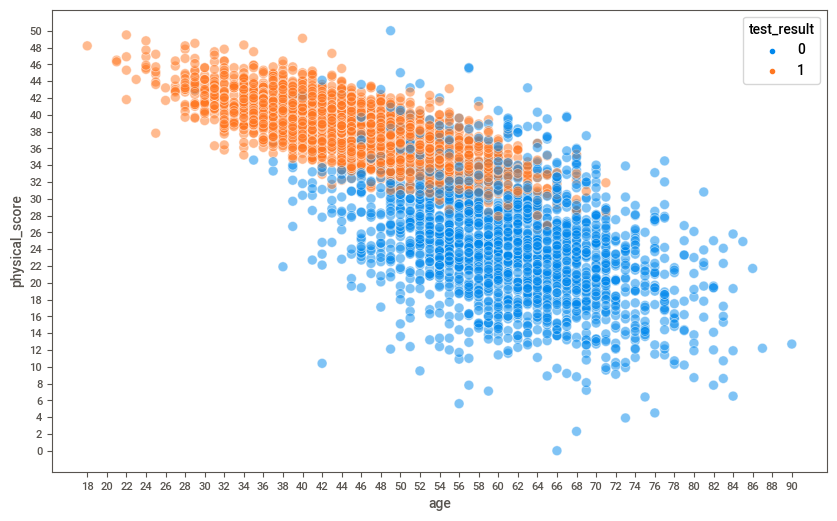

In [34]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5, s = 50)

# x ve y eksenlerindeki artış değerlerini 2'şer 2'şer yap
plt.xticks(range(int(df['age'].min()), int(df['age'].max())+1, 2))
plt.yticks(range(int(df['physical_score'].min()), int(df['physical_score'].max())+1, 2))

# Grafiği göster
plt.show()

In [35]:
# Tüm hataları listelenmiş hali
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1))]

,age,physical_score,test_result,pred__proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.454,0
2145,65.000,35.200,0,0.602,1
3200,60.000,32.900,1,0.465,0
1726,46.000,36.700,0,0.934,1
3731,57.000,31.900,1,0.422,0
3330,57.000,37.000,0,0.864,1
4582,44.000,33.400,0,0.806,1
1165,57.000,34.600,0,0.697,1
1525,46.000,30.700,0,0.527,1


# Model Performance on Classification Tasks

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

### Accuracy (Doğruluk)

- Bir modelin tüm tahminlerinin ne kadarının doğru olduğunu gösterir.

- Doğru tahminlerin toplam tahmin sayısına oranıdır.

- Genel performans ölçüsüdür ama dengesiz sınıflarda yanıltıcı olabilir.

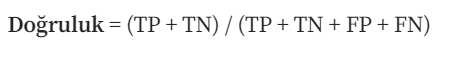

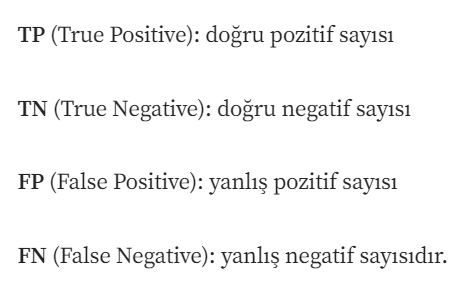

In [37]:
accuracy_score(y_test, y_pred)

0.93

In [38]:
log_model.score(X_test_scaled, y_test) ## Accuracy ile aynı skoru üretir = log model score

0.93

### Precision (Hassasiyet)

- Pozitif olarak tahmin edilen durumların gerçekte ne kadarının pozitif olduğunu gösterir.

- True Positive'leri (TP) tüm positive'lere (TP+FP) böler.

- Yanlış pozitiflerin (false positives) etkisini minimize etmeye odaklanır.

- Özellikle yanlış pozitiflerin maliyetli olduğu durumlarda önemlidir.

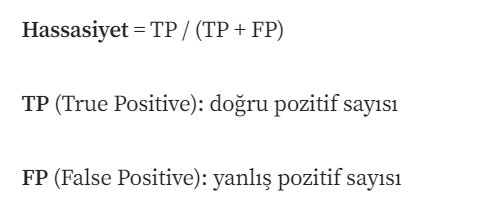

In [39]:
precision_score(y_test, y_pred)

0.9331210191082803

### Recall Score (Duyarlılık)

- Gerçekte pozitif olan durumların, model tarafından ne kadarının doğru tahmin edildiğini gösterir.

- Yanlış negatifleri (false negatives) minimize etmeye odaklanır.

- Özellikle yanlış negatiflerin maliyetli olduğu durumlarda önemlidir.

- False negative'lerin maaliyetinin yüksek olduğu zamanlarda önem arz eder

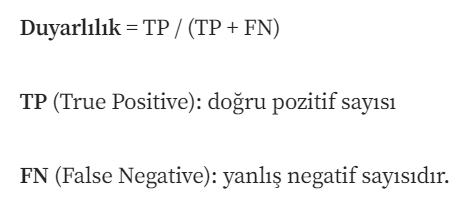

In [40]:
recall_score(y_test, y_pred)

0.9543973941368078

### f1_score

- Precision ve Recall'un harmonik ortalamasıdır.

- Dengeli bir ölçüm sağlar, her iki metriği de dikkate alır.

- Hem yanlış pozitifleri hem de yanlış negatifleri önemli olduğunda kullanılır.

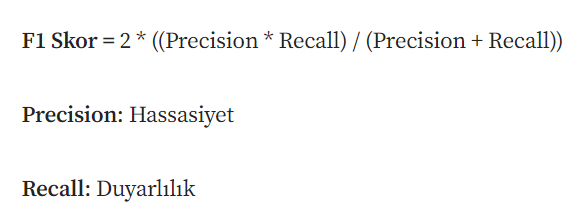

### Log Los (Logaritmik Kayıp)

- Tahmin edilen olasılıkların gerçek değerlerden ne kadar sapma gösterdiğinin bir ölçüsüdür.
- Modelin ne kadar "emin" olduğunu ve bu eminliğin gerçekle ne kadar uyumlu olduğunu değerlendirir.
- Daha hassas bir performans değerlendirmesi sağlar, özellikle olasılık temelli modellerde kullanılır.
- 1'den büyükse model performansı kötüdür.

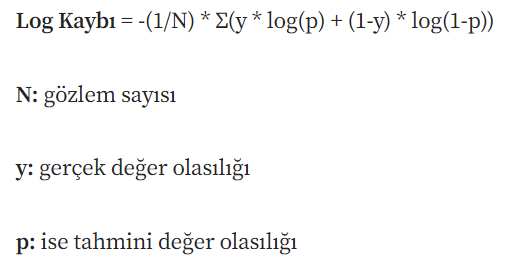

In [41]:
log_loss(y_test, y_pred)

2.523055737238201

- Log loss, modelin tahminlerinin gerçek sınıflarla ne kadar iyi uyum sağladığını ölçer. Daha spesifik olarak, modelin tahminlerinin gerçek etiketlerle olan olasılık uyumunu değerlendirir.

- Hesaplama: Gerçek sınıf etiketleri ve tahmin edilen olasılıklar arasındaki uyumsuzluğu, olasılıkların logaritmasını alarak hesaplar.

Log Loss değerleri için ortalama olarak "iyi" veya "kötü" olarak kabul edilen belirli bir eşik sunmak zor olabilir, çünkü bu değerlendirmeler problemin bağlamına, veri setinin özelliklerine ve hedeflenen uygulamaya göre değişiklik gösterebilir. Ancak, genel bir kılavuz olarak bazı yönlerden bahsedebiliriz:

- **Log Loss = 0**: İdeal durum, mükemmel bir modeli ifade eder. Modelin tüm tahminleri gerçek değerlerle tam bir uyum içindedir.
0 < Log Loss ≤ 0.5: Genellikle kabul edilebilir bir performans aralığı olarak değerlendirilir. Değerin düşük olması modelin iyi performans gösterdiğini gösterir. Bu aralık, modelin çoğu tahmininde doğru sınıf olasılıklarını makul bir doğrulukla verdiğini gösterir.

- **0.5 < Log Loss < 1.0**: Bu aralık, modelin bazı tahminlerde belirgin hatalar yaptığını gösterir ancak yine de bazı faydalı bilgiler sağlayabilir. Bu durum, modelin iyileştirilmesi gerektiğinin bir işaretidir.

- **Log Loss ≥ 1.0**: Genellikle kötü bir model performansını gösterir. Bu, modelin tahminlerinin gerçek sınıflardan önemli ölçüde sapma gösterdiğini ve bu tahminlerin çoğunun yanlış olduğunu belirtir.

Bu değerler yalnızca çok genel bir kılavuzdur ve özellikle belirli bir problem için "iyi" veya "kötü" olarak kabul edilen değerler bu genel kılavuzdan farklı olabilir. Örneğin, bazı durumlarda, 0.2 veya daha düşük bir Log Loss değeri çok iyi bir sonuç olarak kabul edilebilirken, daha karmaşık veya dengesiz veri setlerinde 0.6 değeri bile makul bir başarı olarak görülebilir.

Modelinizi değerlendirirken, Log Loss değerlerini modelin hedeflediği uygulamanın gereksinimleri ve beklenen performans seviyesi çerçevesinde değerlendirmek önemlidir. Ayrıca, modelin performansını tam olarak anlamak için Log Loss ile birlikte diğer metrikleri (örneğin, doğruluk, hassasiyet, duyarlılık, F1 skoru) de dikkate almak yararlıdır.

## Confusion Matrix

- Confusion Matrix, sınıflandırma problemlerinde bir modelin performansını değerlendirmek için kullanılan bir tablodur. Bu matris, modelin tahminlerinin gerçek değerlerle ne kadar iyi eşleştiğini gösterir.

- TP, TN, FP, FN terimlerinden oluşur.

- Bu matris sayesinde, modelin sınıflandırma başarısını ve hatalarını daha net görebiliriz.

## Classification Report

Classification Report, bir sınıflandırma modelinin performansını özetleyen bir rapordur. Bu rapor, modelin her bir sınıf için başarısını ölçen birkaç anahtar metriği içerir:

- **Precision (Kesinlik):** Pozitif olarak tahmin edilen örnekler arasında gerçekten pozitif olanların oranı. Yüksek bir kesinlik, az sayıda yanlış pozitif tahmin yapıldığını gösterir.

- **Recall (Duyarlılık):** Gerçekte pozitif olan örnekler arasında modelin pozitif olarak doğru tahmin ettiği oran. Yüksek bir duyarlılık, az sayıda yanlış negatif tahmin yapıldığını gösterir.

- **F1 Score:** Kesinlik ve duyarlılığın harmonik ortalamasıdır. Modelin kesinlik ve duyarlılık arasındaki dengeyi değerlendirir.

- **Support:** Her sınıftaki gerçek örneklerin sayısı. Modelin veri setindeki sınıflar arasındaki dengesizlikleri görmek için faydalıdır.

Bu rapor, modelin sınıf bazında performansını detaylı bir şekilde anlamamızı sağlar ve iyileştirilmesi gereken alanlara dair ipuçları verir.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [43]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [44]:
TP = 10
TN = 70
FP = 0
FN = 10

acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
recc = TP / (TP + FN)
F1 = 2 * ((prec * recc) / (prec + recc))

print("Accuracy : {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall   : {:.2f}".format(recc))
print("F1 Score : {:.2f}".format(F1))

Accuracy : 0.89
Precision: 1.00
Recall   : 0.50
F1 Score : 0.67


**Doğruluk (Accuracy)**

* **Ne Zaman Kullanılır:** Dengeli veri setlerinde, yani her sınıfın yaklaşık eşit sayıda örneğe sahip olduğu durumlarda kullanılır.
* **Açıklama:** Doğruluk, modelin toplam tahminlerinin ne kadarının doğru olduğunu gösterir. Ancak, dengesiz veri setlerinde yanıltıcı olabilir çünkü model sadece çoğunluk sınıfını doğru tahmin ederek yüksek doğruluk elde edebilir.

**Hassasiyet (Precision) ve Duyarlılık (Recall)**

* **Ne Zaman Kullanılır:** Özellikle bir sınıfın (genellikle pozitif sınıf) doğru tahmin edilmesinin önemli olduğu durumlarda kullanılır.
* **Açıklama:** Hassasiyet, pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranını; duyarlılık ise gerçekten pozitif olan örneklerin doğru tahmin edilme oranını gösterir.

**F1 Skoru**

* **Ne Zaman Kullanılır:** Hassasiyet ve duyarlılığın her ikisinin de önemli olduğu durumlarda, özellikle dengesiz veri setlerinde kullanılır.
* **Açıklama:** F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve her iki metriği dengeler. Dengesiz veri setlerinde, azınlık sınıfının göz ardı edilmesini önlemek için kullanılır.


**Multiclass target olduğunda!**

**Macro Average (Makro Ortalama)**

* **Ne Zaman Kullanılır:** Dengesiz veri setlerinde, her sınıfın eşit derecede önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metriklerin (örneğin, F1 skoru) basit aritmetik ortalaması alınır. Her sınıf eşit ağırlıkta değerlendirilir, böylece azınlık sınıflarının performansı da dikkate alınır.

**Weighted Average (Ağırlıklı Ortalama)**

* **Ne Zaman Kullanılır:** Her sınıfın veri setindeki temsili oranına göre ağırlıklandırılmasının önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metrikler, o sınıfın veri setindeki oranına göre ağırlıklandırılır. Bu, çoğunluk sınıfının model performansı üzerinde daha büyük etkiye sahip olmasını sağlar.

Her bir metrik, modelin farklı yönlerini vurgular ve hangi metriğin kullanılacağı, problemin doğası ve özel ihtiyaçlarınıza bağlıdır. Özellikle dengesiz veri setlerinde, modelin her sınıf üzerindeki performansını anlamak için birden fazla metriği kullanmak ve karşılaştırmak yararlı olabilir.

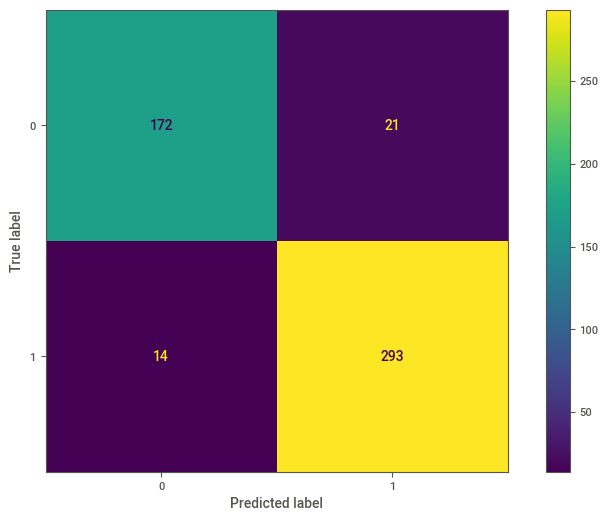

In [45]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

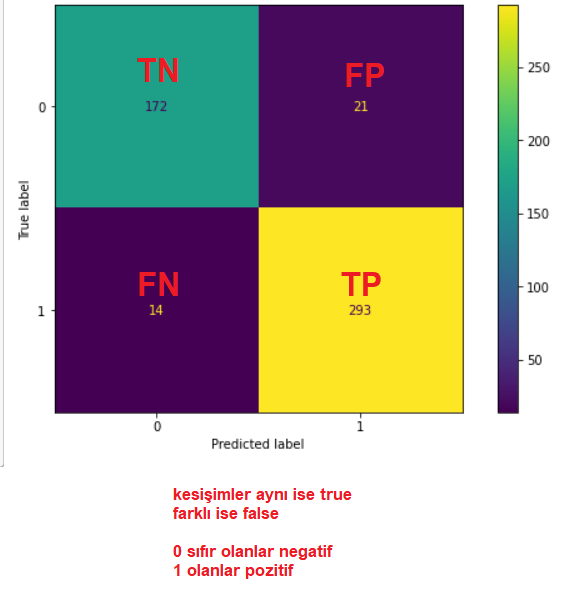

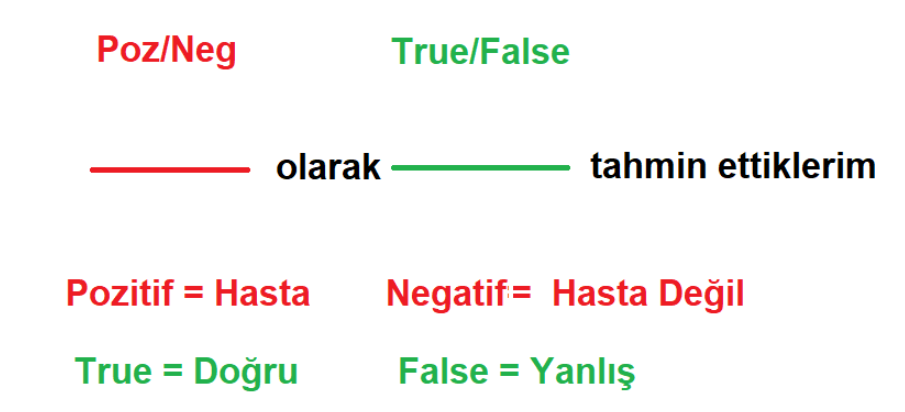

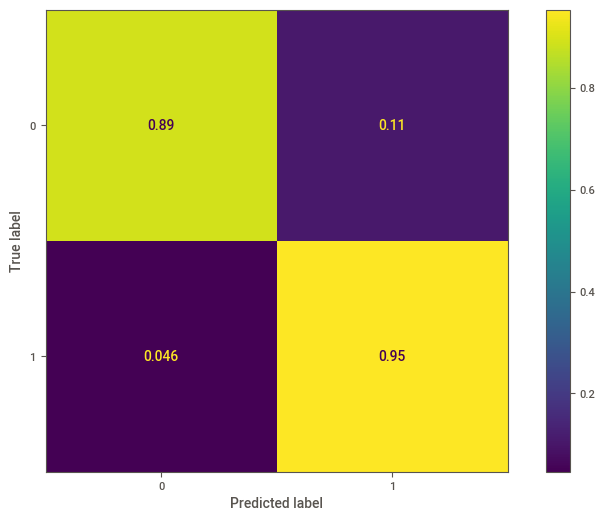

In [46]:
# Oransal olarak gösterir

ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');

Normalize=True dediğimizde değerleri oransal olarak verir. Kendi içlerinde yani ilk satır için 172 ile 21 in: 172/172+21=0,89
yani ilk satır için her ikisnin toplamı 1

Model, 

**0 olanların** %89'unu bilip, %11'ini bilememiş.

**1 olanların** ise %95'ini bilip, yaklaşık %5 ini bilememiş.

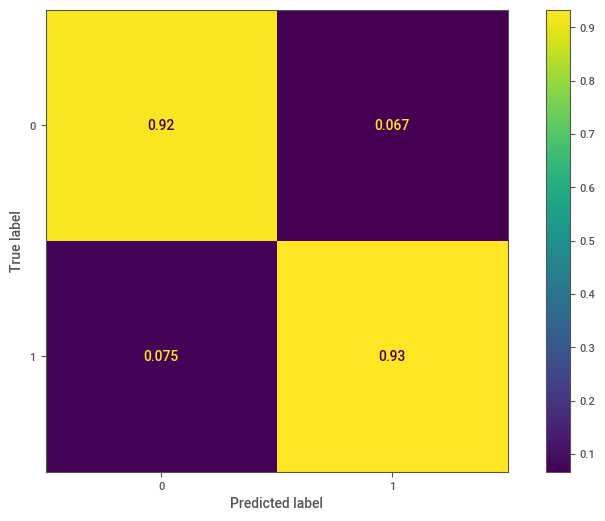

In [47]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='pred');

İlk sütun için, model 0 dediklerinin %92'sini doğru bilmişken, %7,5'ini yanlış bilmiş.

İkinci sütun için, model 1 dediklerinin %93'ünü doğru bilmişken, %6,7'sini yanlış bilmiş.

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [49]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



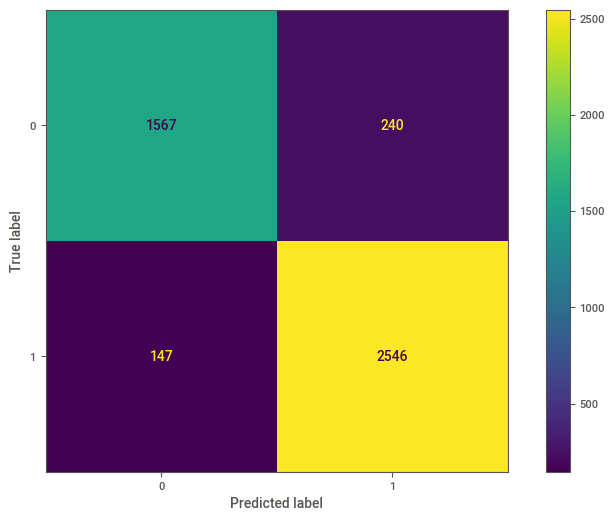

In [50]:
ConfusionMatrixDisplay.from_estimator(log_model, X_train_scaled, y_train);

## CV

In [53]:
from sklearn.model_selection import cross_validate

In [54]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [55]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv=10)
df.scores = pd.DataFrame(scores, index = range(1, 11))
df.scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.029,0.015,0.900,0.889,0.952,0.919
2,0.028,0.017,0.924,0.921,0.956,0.938
3,0.030,0.010,0.936,0.917,0.981,0.948
4,0.029,0.016,0.931,0.938,0.948,0.943
5,0.025,0.008,0.938,0.941,0.955,0.948
6,0.032,0.011,0.902,0.934,0.900,0.917
7,0.036,0.011,0.898,0.889,0.948,0.917
8,0.032,0.009,0.911,0.896,0.963,0.928
9,0.033,0.012,0.891,0.910,0.907,0.909
10,0.024,0.009,0.916,0.911,0.952,0.931


In [56]:
df.scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [58]:
print("Test set")
print(classification_report(y_test, y_pred))
print("----------------------------------------------")
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

Test set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

----------------------------------------------
Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



CV'nin verdiği score'ları her zaman 1 class'ına göre karşılaştırmalıyız.

## ROC(Receiver Operating Characteristic) Curve

**Tanım:** ROC eğrisi, sınıflandırma modelinin çeşitli eşik değerlerdeki performansını gösterir. Yatay eksende yanlış pozitif oranı (False Positive Rate - FPR), dikey eksende ise doğru pozitif oranı (True Positive Rate - TPR) bulunur.

**Kullanım Amacı:** Modelin sınıflandırma yeteneğini farklı eşik değerlerde değerlendirerek en uygun eşik değerinin belirlenmesine yardımcı olur.

**Nasıl Çizilir:** Çeşitli eşik değerlerindeki TPR ve FPR değerleri hesaplanır ve bu değerler bir grafik üzerinde birleştirilerek ROC eğrisi çizilir.

**Değerlendirme:** Mükemmel bir sınıflandırıcı, ROC eğrisinin sol üst köşeye yakın olmasını sağlar; yani, TPR yüksekken FPR düşük olmalıdır.

## AUC(Area Under Curve)

**Tanım:** AUC, ROC eğrisinin altında kalan alanın büyüklüğüdür ve modelin sınıflandırma performansının bir ölçüsü olarak kullanılır.

**Değer Aralığı:** AUC değeri 0 ile 1 arasında değişir. Değer ne kadar 1'e yakınsa, model o kadar iyi sınıflandırma yapar.

**Kullanım Amacı:** Farklı modellerin sınıflandırma performanslarını sayısal bir değer üzerinden karşılaştırmak ve en iyi modeli seçmek için kullanılır.

**Değerlendirme:**
- 0.5: Modelin sınıflandırma yeteneği rastgele tahmin yapma seviyesindedir.
- 1.0: Model mükemmel sınıflandırma performansına sahiptir.
- < 0.5: Modelin sınıflandırma performansı rastgele tahminden daha kötüdür, bu durumda modelin veya verinin yeniden değerlendirilmesi gerekebilir.